# Loading Libraries

In [3]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping


# Setting Directories and Image Shape

In [12]:
#basic parameters
train_dir = "images/train/"
test_dir = "images/test/"
height = 331
width = 331
batch_size = 32

# Loading and Preprocessing Image

In [13]:
# Image rescaling for preprocessing

datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = datagen.flow_from_directory(train_dir,
                                            target_size = (height, width),
                                            batch_size=batch_size,
                                            class_mode = 'categorical')

test_generator = datagen.flow_from_directory(test_dir,
                                            target_size = (height, width),
                                            batch_size=batch_size,
                                            class_mode = 'categorical')

a = train_generator.class_indices
class_names = list(a.keys())
print("\n",class_names)

Found 11005 images belonging to 36 classes.
Found 9981 images belonging to 36 classes.

 ['_background_noise_', 'backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


# Loading Pretrained Trained Model and Freezing Layers 

In [6]:
# load the InceptionResNetV2 architecture with imagenet weights as base
base_model = tf.keras.applications.InceptionResNetV2(include_top = False,
                                                    weights = 'imagenet',
                                                    input_shape=(height, width,3))

#freeze layers
base_model.trainable = False

# Building Model

In [7]:
model = Sequential()
model.add(base_model)
model.add(BatchNormalization(renorm=True))
model.add(MaxPooling2D(2,2))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(36, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 9, 9, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 9, 9, 1536)       10752     
 tchNormalization)                                               
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 1536)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 4, 4, 512)         786944    
                                                                 
 dense_1 (Dense)             (None, 4, 4, 256)         131328    
                                                        

## Implement Early Stopping

In [8]:
early = EarlyStopping(patience = 10,
                    min_delta = 0.001,
                    restore_best_weights = True)

# Training

## Training 1st Time

In [9]:
history = model.fit(train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_data = test_generator,
                    validation_steps = test_generator.n//test_generator.batch_size,
                    epochs = 15,
                    verbose = 1,
                    callbacks = [early])

#ran 15 epoch, accuracy platued at around 0.54                    

Epoch 1/15
343/343 [==============================] - 245s 657ms/step - loss: 3.2078 - accuracy: 0.1254 - val_loss: 2.6520 - val_accuracy: 0.2588
Epoch 2/15
343/343 [==============================] - 221s 644ms/step - loss: 2.4439 - accuracy: 0.3012 - val_loss: 2.1226 - val_accuracy: 0.3853
Epoch 3/15
343/343 [==============================] - 222s 647ms/step - loss: 2.0132 - accuracy: 0.3982 - val_loss: 1.8834 - val_accuracy: 0.4452
Epoch 4/15
343/343 [==============================] - 221s 643ms/step - loss: 1.7382 - accuracy: 0.4834 - val_loss: 1.7830 - val_accuracy: 0.4833
Epoch 5/15
343/343 [==============================] - 220s 643ms/step - loss: 1.5154 - accuracy: 0.5411 - val_loss: 1.7429 - val_accuracy: 0.4999
Epoch 6/15
343/343 [==============================] - 220s 643ms/step - loss: 1.3709 - accuracy: 0.5758 - val_loss: 1.6991 - val_accuracy: 0.5022
Epoch 7/15
343/343 [==============================] - 220s 643ms/step - loss: 1.2030 - accuracy: 0.6288 - val_loss: 1.6862 -

## Training 2nd Time

In [10]:
history = model.fit(train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_data = test_generator,
                    validation_steps = test_generator.n//test_generator.batch_size,
                    epochs = 15,
                    verbose = 1,
                    callbacks = [early])

#additional 15 epoch so a total of 30 epoch

Epoch 1/15
343/343 [==============================] - 215s 626ms/step - loss: 0.4644 - accuracy: 0.8512 - val_loss: 2.1360 - val_accuracy: 0.5519
Epoch 2/15
343/343 [==============================] - 218s 635ms/step - loss: 0.4552 - accuracy: 0.8553 - val_loss: 2.0953 - val_accuracy: 0.5510
Epoch 3/15
343/343 [==============================] - 218s 637ms/step - loss: 0.4144 - accuracy: 0.8648 - val_loss: 2.2857 - val_accuracy: 0.5414
Epoch 4/15
343/343 [==============================] - 218s 637ms/step - loss: 0.4179 - accuracy: 0.8715 - val_loss: 2.2940 - val_accuracy: 0.5436
Epoch 5/15
343/343 [==============================] - 219s 638ms/step - loss: 0.3528 - accuracy: 0.8859 - val_loss: 2.3283 - val_accuracy: 0.5501
Epoch 6/15
343/343 [==============================] - 217s 634ms/step - loss: 0.3623 - accuracy: 0.8855 - val_loss: 2.3610 - val_accuracy: 0.5446
Epoch 7/15
343/343 [==============================] - 218s 637ms/step - loss: 0.3188 - accuracy: 0.8991 - val_loss: 2.4941 -

# Evaluate Model

In [11]:
accuracy_score = model.evaluate(test_generator)
print("Accuracy: {:.2f}%".format(accuracy_score[1] * 100)) 

312/312 [==============================] - 102s 324ms/step - loss: 2.0976 - accuracy: 0.5509
Accuracy: 55.09%


# Saving trained Model

In [12]:
model.save("model2.h5")

# Plotting Graph

In [13]:
#Initialising basic values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(accuracy))

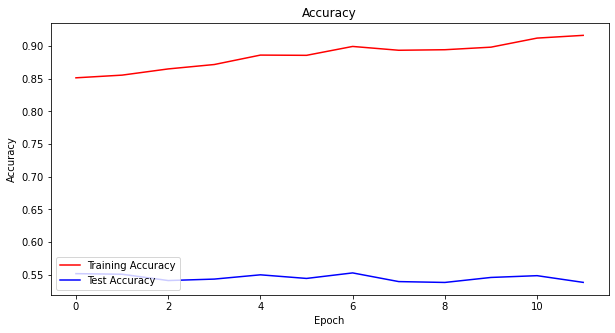

Text(0.5, 1.0, 'Training and Test loss')

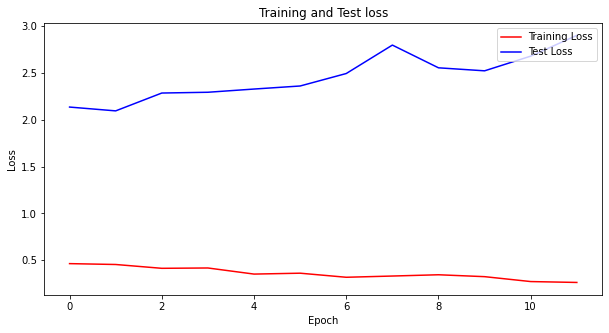

In [14]:
#Plotting the graph for the accuracy of training and testing
fig = plt.figure(figsize=(10,5))
plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Test Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower left')
plt.show()

#Plotting the graph for the loss of training and testing
fig2 = plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Test Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test loss')

# Loading Test Image

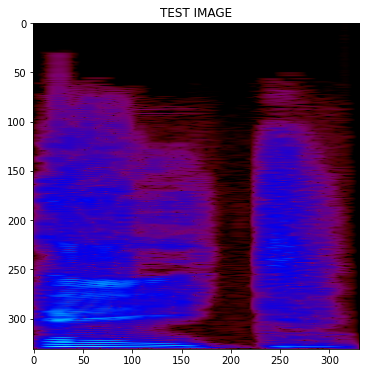

In [31]:
test_img_path = "eight.png"
  
img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (331, 331)).reshape(-1, 331, 331, 3)/255.0
  
plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])

# Prediction

In [55]:
predictions = []

img = tf.keras.preprocessing.image.load_img(test_img_path)
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (331, 331))
img = tf.reshape(img, (-1, 331, 331, 3))
prediction = model.predict(img/255)
predictions.append(np.argmax(prediction))


print("\nPrediction:")
my_submission = pd.DataFrame({'image_id': test_img_path, 'label':  predictions})
my_submission.to_csv('transfer.csv', index=False)
my_submission.head()

1/1 [==============================] - 0s 404ms/step

Prediction:


,image_id,label
0,eight.png,5


In [40]:
from keras.preprocessing import image

img = tf.keras.preprocessing.image.load_img(test_img_path, target_size = (height, width))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

model.predict(img/255)

1/1 [==============================] - 0s 426ms/step


array([[6.40097505e-06, 2.69919913e-02, 1.28413644e-02, 1.81389257e-01,
        9.84802842e-04, 4.06059846e-02, 4.09020018e-03, 9.59867984e-03,
        2.42083315e-02, 6.49612257e-03, 6.29712688e-03, 9.40309279e-03,
        4.45103757e-02, 3.26179340e-02, 2.14257482e-02, 3.87332849e-02,
        1.72914058e-01, 3.72690223e-02, 1.19112525e-02, 6.31047487e-02,
        3.31446528e-02, 1.60963871e-02, 4.47164029e-02, 6.25767931e-02,
        1.50694454e-03, 3.03449132e-03, 6.62604230e-04, 2.40895402e-04,
        3.51048000e-02, 4.57919342e-03, 1.06056603e-02, 4.92433505e-03,
        9.91466083e-03, 1.31916804e-02, 9.88656376e-03, 4.41414863e-03]],
      dtype=float32)

# Predicting Using Saved Model

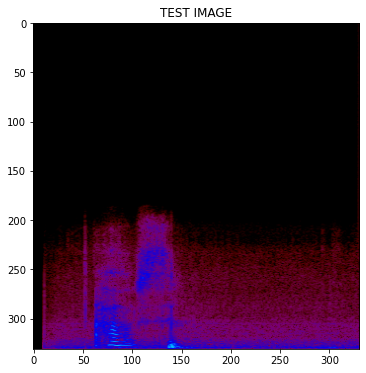

In [49]:
test_img_path = "house.jpg"
  
img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (331, 331)).reshape(-1, 331, 331, 3)/255.0
  
plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])

In [47]:
saved_model = tf.keras.models.load_model("model2.h5")

In [50]:
predictions2 = []

img = tf.keras.preprocessing.image.load_img(test_img_path)
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (331, 331))
img = tf.reshape(img, (-1, 331, 331, 3))
prediction2 = saved_model.predict(img/255)
predictions2.append(np.argmax(prediction2))

print("\nPrediction:")
my_submission = pd.DataFrame({'image_id': test_img_path, 'label':  predictions2})
my_submission.to_csv('transfer.csv',mode='a', index=False)
my_submission.head()

1/1 [==============================] - 0s 376ms/step

Prediction:


,image_id,label
0,house.jpg,5
